
# **Table of Contents**
* [1. Introduction](#chapter1)
    * [1.1 Objectif commercial](#section_1_1)
    * [1.2 Aperçu de la méthode](sSection_1_2)
    * [1.3 Desciption des données](sSection_1_2)
    * [1.4 Packages utilisés](sSection_1_2)
        
* [2. Aperçu général des données](#chapter2)
* [3. Prétraitement](#chapter2)
* [4. L'analyse exploratoire des données EDA](#chapter2)
* [5. Feature engineering](#chapter2)
* [6. Modèle](#chapter2)




# **1. Introduction**


## **1.1 Objectif commercial**
  The goal is to identify and form segments of customers based on similar  purchasing characteristics (from transactional data) to inform the sales and marketing strategy of the company. Hypothetically speaking, the company is interested in profiles for customers located in the U.K. where the majority of their customers are concentrated in. In terms of currency, the company hypothetically requested that it be in U.S. dollar rather than in pounds. Lastly, the company also requested that the analysis be based on transactional data from one year (here defined as -> minus one year from the last day of transaction recorded in the dataset).

## **1.2 Aperçu de la méthode**
Segment users based on their consumer profiles using RFM and produced dashboard for hypothetical client (online store marketing and sales team). My mains steps:

1. Vous avez une idée générale des données sous-jacentes grâce aux étapes d'exploration de base
2. Traitement des valeurs manquantes, des données erronées ou défectueuses, des doublons supprimés et des types de données modifiés.
3. Réaliser une analyse exploratoire des données. Exploration de la distribution des variables (c.-à-d. Nombre de livraison) dans le temps (date, mois) et par livreur.
4. Pré-traité et mené une analyse de clustering exploratoire des produits; a utilisé l'algorithme non supervisé fastText de Facebook pour créer des vecteurs à partir du nom du produit, puis appliqué des K-means sur le résultat (aucun test statistique n'a été effectué pour tester les performances de clustering de K-means.
5. Modèle Linear Regression, Ridge Regression 
Lasso Regression, ElasticNet Regression utilisés pour ......


## **1.3 Description des données**
The dataset contains the transaction history of Everything Plus, an online store that sells household goods.

Les fichiers **Train.csv**, **Test.csv**, **Riders.csv** contiennent les colonnes suivantes:


0.	**User Id :** 	Numéro unique identifiant le client sur une plateforme
1.	**Vehicle Type :**  Pour cette compétition limitée aux vélos
2.	**Platform Type :**	 Plate-forme utilisée pour passer la commande, il existe 4 types
3.	**Personal or Business :**	 Type de client
4.	**Placement - Day of Month :**	 Placement - Jour du mois soit 1-31
5. **Placement - Weekday (Mo = 1) :**	Placement - Jour de la semaine (lundi = 1)
6. **Placement - Time**	: Placement - Time - Heure du jour où la commande a été passée
7.	**Confirmation - Day of Month :**	 Confirmation - Jour du mois soit 1-31
8.	**Confirmation - Weekday (Mo = 1) :**	 Confirmation - Jour de la semaine (lundi = 1)
9.	**Confirmation - Time :**	 Confirmation - Heure - Heure du jour où la commande a été confirmée par un coureur
10.	**Arrival at Pickup - Day of Month :**	Arrivée à la prise en charge - Jour du mois, c'est-à-dire 1-31
11.	**Arrival at Pickup - Weekday (Mo = 1) :**	Arrivée au ramassage - en semaine (lundi = 1)
12.	**Arrival at Pickup - Time :**	Heure de la journée à laquelle le coureur est arrivé à l'endroit pour récupérer la commande
13.	**Pickup - Day of Month :**	 Ramassage - Jour du mois soit 1-31
14.	**Pickup - Weekday (Mo = 1) :**	 Ramassage - Jour de la semaine (Lundi = 1)
15.	**Pickup - Time**	: Ramassage - Heure - Heure de la journée à laquelle le cavalier récupère la commande
16.	**Arrival at Destination - Day of Month :**Arrivée à la livraison - Jour du mois soit 1-31
17.	**Arrival at Destination - Weekday (Mo = 1) :**	Arrivée à la livraison - Jour de la semaine (lundi = 1)
18.	**Arrival at Destination - Time :**	Heure d'arrivée à la livraison - Heure de la journée ...
19.	**Distance (KM) :**	 La distance de la prise en charge à la destination
20.	**Temperature :** Température au moment de la passation de la commande en degrés Celsius
21.	**Precipitation in millimeters :** Précipitations au moment de la passation de la commande
22.	**Pickup Lat :**	Latitude du lieu de ramassage
23.	**Pickup Long :**	Longitude du lieu de ramassage
24.	**Destination Lat :**	 Latitude du lieu de livraison
25.	**Destination Long :** Longitude du lieu de livraison
26.	**Rider Id :**	 ID du Rider qui a accepté la commande
27.	**Time from Pickup to Arrival :**	Durée en secondes entre la prise en charge et l'arrivée à destination
28.	**Rider Metrics**	
29.	**Rider Id :**	 Numéro unique identifiant le cavalier
30.	**No_Of_Orders :** Nombre de commandes que le coureur a livrées
31.	**Age :**	 Nombre de jours depuis que le cavalier a livré la première commande
32.	**Average_Rating :**	 Note moyenne du coureur
33.	**No_of_Ratings :** Nombre de notes que le coureur a reçues.

## **1.4 Packages utilisés**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

%matplotlib inline 
from matplotlib.ticker import FuncFormatter
import matplotlib.style as style

import seaborn as sns

#Dates
import datetime as dt
today = dt.datetime.today().strftime("%Y.%m.%d")

#Localisation
import sys
import webbrowser
from geopy.distance import geodesic

# **2. Aperçu général des données**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("/content/drive/MyDrive/Train.csv")
test = pd.read_csv("/content/drive/MyDrive/Test.csv")
riders = pd.read_csv("/content/drive/MyDrive/Riders.csv")

train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


# **3. Prétraitement**

# **4. L'analyse exploratoire des données EDA**


# **5. Feature engineering**

In [ ]:
Training_Feature_Eng = train.copy()
Testing_Feature_Eng  = test.copy()

##**5.1 Placement Time of Day**

*   Nous avons créé une nouvelle variable (*Placement Time of Day*) pour (*Placement-Time*) afin d'extraire la partie heure pour les deux bases Training_Feature_Eng et Testing_Feature_Eng.



In [ ]:
from datetime import datetime as dt
Training_Feature_Eng['Placement - Time'] = Training_Feature_Eng['Placement - Time'].apply(lambda x: dt.strptime(x,'%I:%M:%S %p'))
Training_Feature_Eng['Placement Time of Day'] = Training_Feature_Eng['Placement - Time'].dt.hour



*   Nous avons créé de nouveaux variables (*Confirmation Time of Day, Pickup Time of Day, Arrival at Pickup Time of Day et Arrival at Destination Time of Day*) pour chaque variable temps comme celle de  (*Placement Time of Day*) pour les convertir en heures.



## **5.2 Actual Day of Placement**



*   D'après les statistiques que nous avons fait, nous avons remarqué que le nombre de livraison est très grands en Jour de la semaine par rapport au weekend.
*   Nous avons créé de nouvelles variables - Regroupement de la variable "...Weekday (Mo=1)" 'Weekday' et 'Weekend'.

      1.   Weekday commence du lundi = 1 au vendredi = 5
      2.   Weekend commence du samedi = 6 et dimanche = 7





In [ ]:
Training_Feature_Eng['Actual Day of Placement'] = np.where(Training_Feature_Eng['Placement - Weekday (Mo = 1)']< 6,
                                                   'Weekday','Weekend')

In [ ]:
print(Training_Feature_Eng['Actual Day of Placement'].head())

0    Weekday
1    Weekday
2    Weekday
3    Weekday
4    Weekday
Name: Actual Day of Placement, dtype: object


## **5.3 Pickup Latitude , Pickup Longitude**


*   Nous avons utilisé Central Business District (CBD) of Nairobi comme référence.
*   Nous avons créé  deux nouveaux variables (*Proximity to Pickup Point* et *Proximity to Pickup Destination*) dans lesquels nous avons utilisé les cordonnées (*Pickup Lat* et *Pickup Long*, *Destination Lat* et *Destination Long*) pour calculer la distance en KM par rapport au centre.



In [ ]:
from geopy.distance import geodesic

Training_Feature_Eng['Proximity to Pickup Point'] = np.nan

CBD_Nairobi=(-1.299719, 36.816097)

for i, row in Training_Feature_Eng.iterrows():
    Training_Feature_Eng.loc[i, 'Proximity to Pickup Point'] = geodesic((Training_Feature_Eng.loc[i, 'Pickup Lat'],
                                                                  Training_Feature_Eng.loc[i, 'Pickup Long']),CBD_Nairobi).km 
for i, row in Training_Feature_Eng.iterrows():
    Training_Feature_Eng.loc[i, 'Proximity to Destination'] = geodesic((Training_Feature_Eng.loc[i, 'Destination Lat'],
                                                                  Training_Feature_Eng.loc[i, 'Destination Long']),CBD_Nairobi).km

In [ ]:
print(Training_Feature_Eng['Proximity to Pickup Point'].head())

0     2.549607
1    10.885586
2     3.184815
3     2.727265
4     4.531556
Name: Proximity to Pickup Point, dtype: float64


## **5.4 Placement Day of Month**


*   Nous avons regroupé les jours du mois en 4 semaines :

    1.   1st Week du premier jour au 7ème
    2.   2nd Week du 8ème jour au 15ème
    3.   3rd Week du 16ème jour au 23ème
    4.   4th Week le reste du mois





In [ ]:
Place_Day_Month = []

for Each_Day in Training_Feature_Eng['Placement - Day of Month']:
    if (Each_Day > 0 and Each_Day <=7):
        Place_Day_Month.append('1st Week')        
    elif (Each_Day > 7 and Each_Day <=15):
        Place_Day_Month.append('2nd Week')
    elif (Each_Day > 15 and Each_Day <=23):
        Place_Day_Month.append('3rd Week')
    else:
        Place_Day_Month.append('4th Week')
        
Training_Feature_Eng['Placement_Day into Weeks'] = Place_Day_Month


In [ ]:
print(Training_Feature_Eng['Placement_Day into Weeks'].head())

0    2nd Week
1    2nd Week
2    4th Week
3    2nd Week
4    2nd Week
Name: Placement_Day into Weeks, dtype: object




*   Nous avons regroupé les autres variables (*Confirmation Day of Month, Arrival at Pickup Day of Month, Pickup Day of Month, Arrival at Destination Day of Month*) en 4 semaines comme (*Placement Day of Month*)






*   **Vérification pour voir le délai de livraison moyen en seconde pour les jours de la semaine et les week-ends pour le placement de la commande**





In [ ]:
Weekend_Weekday = Training_Feature_Eng.groupby(['Actual Day of Placement'], as_index=False).mean()
Weekend_Weekday[['Actual Day of Placement','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

,Actual Day of Placement,Time from Pickup to Arrival
0,Weekday,1562.609337
1,Weekend,1477.017033



*  Nous avons remarqué que dans les week-ends les livraisons sont plus rapide par rapport au jour de la semaine.



## **5.5 Enregistrer d'autres données nettoyées**

*  Séparation des variables catégoriques et des variables numeriques




In [ ]:
Numeric_Train = Training_Feature_Eng._get_numeric_data()
Categorical_Train = Training_Feature_Eng.select_dtypes(include=['object'])

In [ ]:
Categorical_Train.head(2)

,Order No,User Id,Vehicle Type,Personal or Business,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time,Rider Id,Actual Day of Placement,Placement_Day into Weeks
0,Order_No_4211,User_Id_633,Bike,Business,9:40:10 AM,10:04:47 AM,10:27:30 AM,10:39:55 AM,Rider_Id_432,Weekday,2nd Week
1,Order_No_25375,User_Id_2285,Bike,Personal,11:23:21 AM,11:40:22 AM,11:44:09 AM,12:17:22 PM,Rider_Id_856,Weekday,2nd Week


## **5.6 Feature Selection**

*   Nous avons abandonné certaines variables qui, selon nous, n'avaient aucune influence sur la variable (*Time from Pickup to Arrival*)
*   Nous appliquons Label Encoder aux variables catégorielles.

*   Nous avons identifié des caractéristiques à faible variance. Ainsi, les caractéristiques qui ont une valeur constante ou qui n'ont pas beaucoup de variabilité. Ces variables peuvent ne pas aider avec la tâche prédictive et peuvent donc être supprimées.
*   Encore une fois, nous trouvons la multicolinéarité entre les variables d'entrée. La présence de caractéristiques multicolores gonfle l'erreur standard.











### **Supprimer les variables Order No, User Id, Rider Id et Vehicle Type**



In [ ]:
Droppers = ['Order No','User Id','Vehicle Type','Rider Id']

### **Encodage des Variables**

In [ ]:
Encod_Cate_Train = pd.get_dummies(Categorical_Train)

In [ ]:
Encod_Cate_Train.head()

,Order No_Order_No_1,Order No_Order_No_10,Order No_Order_No_100,Order No_Order_No_1000,Order No_Order_No_10000,Order No_Order_No_10002,Order No_Order_No_10004,Order No_Order_No_10005,Order No_Order_No_10006,Order No_Order_No_10007,Order No_Order_No_10008,Order No_Order_No_10009,Order No_Order_No_1001,Order No_Order_No_10011,Order No_Order_No_10013,Order No_Order_No_10014,Order No_Order_No_10016,Order No_Order_No_10019,Order No_Order_No_1002,Order No_Order_No_10020,Order No_Order_No_10021,Order No_Order_No_10023,Order No_Order_No_10025,Order No_Order_No_10026,Order No_Order_No_10027,Order No_Order_No_10028,Order No_Order_No_10029,Order No_Order_No_1003,Order No_Order_No_10030,Order No_Order_No_10031,Order No_Order_No_10032,Order No_Order_No_10034,Order No_Order_No_10035,Order No_Order_No_10036,Order No_Order_No_10037,Order No_Order_No_10039,Order No_Order_No_10041,Order No_Order_No_10042,Order No_Order_No_10043,Order No_Order_No_10044,...,Rider Id_Rider_Id_930,Rider Id_Rider_Id_931,Rider Id_Rider_Id_932,Rider Id_Rider_Id_933,Rider Id_Rider_Id_934,Rider Id_Rider_Id_935,Rider Id_Rider_Id_936,Rider Id_Rider_Id_937,Rider Id_Rider_Id_938,Rider Id_Rider_Id_939,Rider Id_Rider_Id_94,Rider Id_Rider_Id_940,Rider Id_Rider_Id_941,Rider Id_Rider_Id_942,Rider Id_Rider_Id_943,Rider Id_Rider_Id_944,Rider Id_Rider_Id_946,Rider Id_Rider_Id_947,Rider Id_Rider_Id_948,Rider Id_Rider_Id_949,Rider Id_Rider_Id_95,Rider Id_Rider_Id_950,Rider Id_Rider_Id_951,Rider Id_Rider_Id_952,Rider Id_Rider_Id_953,Rider Id_Rider_Id_954,Rider Id_Rider_Id_955,Rider Id_Rider_Id_956,Rider Id_Rider_Id_958,Rider Id_Rider_Id_959,Rider Id_Rider_Id_96,Rider Id_Rider_Id_97,Rider Id_Rider_Id_98,Rider Id_Rider_Id_99,Actual Day of Placement_Weekday,Actual Day of Placement_Weekend,Placement_Day into Weeks_1st Week,Placement_Day into Weeks_2nd Week,Placement_Day into Weeks_3rd Week,Placement_Day into Weeks_4th Week
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0




*   Dans la fonction ci-dessous, nous avons calculé le facteur d'inflation de la variance (VIF) et déterminons et supprimons les caractéristiques qui ont une faible variance




In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(Numeric_Train, thresh=15):
    variables = list(range(Numeric_Train.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(Numeric_Train.iloc[:, variables].values, ix)
               for ix in range(Numeric_Train.iloc[:, variables].shape[1])]
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + Numeric_Train.iloc[:, variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining Variables are :')
    print(Numeric_Train.columns[variables])
    return Numeric_Train.iloc[:, variables]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Cleaned_Train = VIF(Numeric_Train,15)

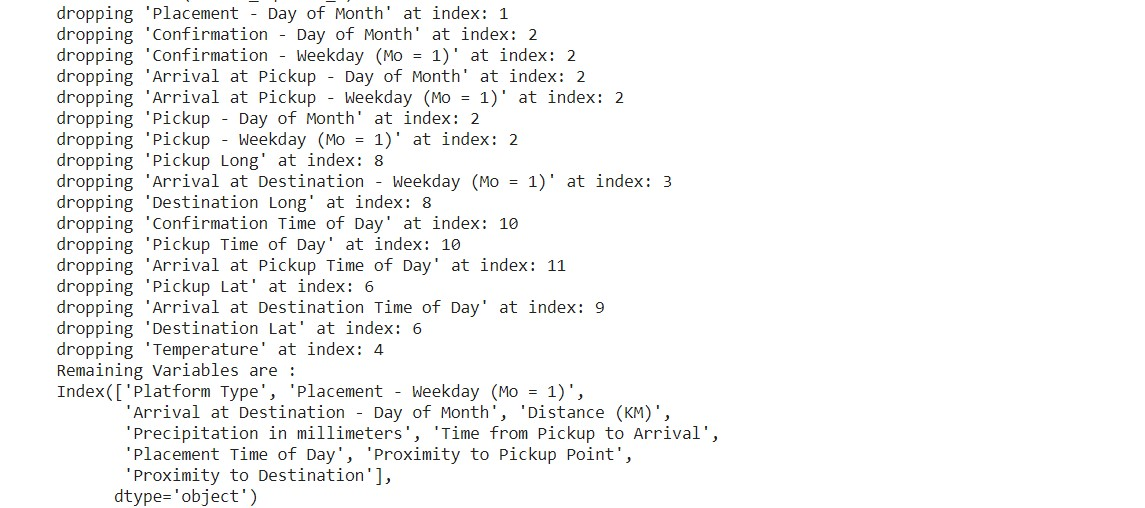



*   Nous remarquons qu'il ya plusieurs variables qui n'ont pas d'influence sur la variable Target et qu'il reste sseulement les variables : 'Platform Type', 'Placement - Weekday (Mo = 1)',
       'Arrival at Destination - Day of Month', 'Distance (KM)',
       'Precipitation in millimeters', 'Time from Pickup to Arrival',
       'Proximity to Pickup Point', 'Proximity to Destination'




### **Concaténation des données encodées avec des données nettoyées**

In [ ]:
Training_Cleaned = pd.concat([Encod_Cate_Train, Cleaned_Train], axis=1)

# **6. Modèle**